# Fun with Census Data 

This data is from the 2010 US Census (available [here](https://www.census.gov/2010census/data/)).

In [9]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats  as stats

'''The population of each state at each decade, as well as the change from previous decade. 
X_POPULATION and X_CHANGE are the column names (X referring to a year ending with 10). 
There are these data for United States, Northeast, Midwest, South, West, 
Puerto Rico, and each individual state'''
pop_change_df = pd.read_csv('data/pop_change.csv', index_col=0, header=0, skiprows=[1,2,3,4,5], thousands=',')
pop_change_df.apply(pd.to_numeric)

,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,2000_POPULATION,...,1920_CHANGE,1930_CHANGE,1940_CHANGE,1950_CHANGE,1960_CHANGE,1970_CHANGE,1980_CHANGE,1990_CHANGE,2000_CHANGE,2010_CHANGE
STATE_OR_REGION,,,,,,,,,,,,,,,,,,,,,
Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,4447100,...,9.8,12.7,7.1,8.1,6.7,5.4,13.1,3.8,10.1,7.5
Alaska,64356,55036,59278,72524,128643,226167,300382,401851,550043,626932,...,-14.5,7.7,22.3,77.4,75.8,32.8,33.8,36.9,14.0,13.3
Arizona,204354,334162,435573,499261,749587,1302161,1770900,2718215,3665228,5130632,...,63.5,30.3,14.6,50.1,73.7,36.0,53.5,34.8,40.0,24.6
Arkansas,1574449,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,2673400,...,11.3,5.8,5.1,-2.0,-6.5,7.7,18.9,2.8,13.7,9.1
California,2377549,3426861,5677251,6907387,10586223,15717204,19953134,23667902,29760021,33871648,...,44.1,65.7,21.7,53.3,48.5,27.0,18.6,25.7,13.8,10.0
Colorado,799024,939629,1035791,1123296,1325089,1753947,2207259,2889964,3294394,4301261,...,17.6,10.2,8.4,18.0,32.4,25.8,30.9,14.0,30.6,16.9
Connecticut,1114756,1380631,1606903,1709242,2007280,2535234,3031709,3107576,3287116,3405565,...,23.9,16.4,6.4,17.4,26.3,19.6,2.5,5.8,3.6,4.9
Delaware,202322,223003,238380,266505,318085,446292,548104,594338,666168,783600,...,10.2,6.9,11.8,19.4,40.3,22.8,8.4,12.1,17.6,14.6
District of Columbia,331069,437571,486869,663091,802178,763956,756510,638333,606900,572059,...,32.2,11.3,36.2,21.0,-4.8,-1.0,-15.6,-4.9,-5.7,5.2


In [10]:
#we can also extract the list of states
states = list(pop_change_df.index)
print(states)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico']


In [13]:
# this transforms the pandas dataframe into a matrix with the countries as rows and the years as columns
M = pop_change_df.as_matrix()[:,:11]
times = np.arange(1910,2020,10)

In [14]:
M.shape

(52, 11)

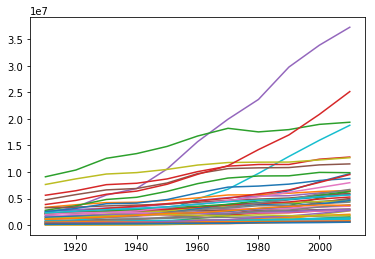

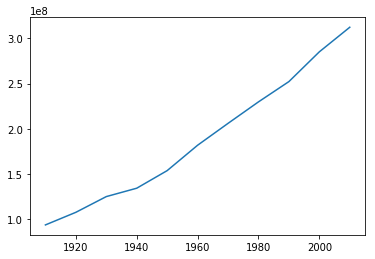

In [37]:
plt.figure()
country_total = M.sum(axis=0)
for state in M:
    plt.plot(times, state)
plt.show()

plt.figure()
plt.plot(times, country_total)
plt.show()

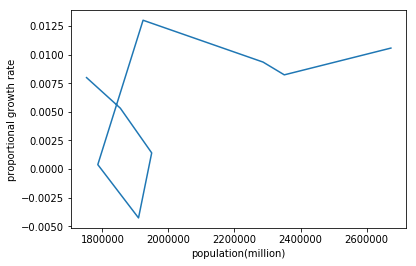

In [35]:
plt.figure()
# for state in M:
#     dN = (state[2:]-state[:-2])/(times[2:]-times[:-2])
#     P = dN / state[1:-1]
#    # Plot the data
#     plt.plot(state[1:-1], P)
#     plt.xlabel('population(million)')
#     plt.ylabel('proportional growth rate')
state = M[3]
dN = (state[2:]-state[:-2])/(times[2:]-times[:-2])
P = dN / state[1:-1]
# Plot the data
plt.plot(state[1:-1], P)
plt.xlabel('population(million)')
plt.ylabel('proportional growth rate')
    
plt.show()

/Users/rossfreeman/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


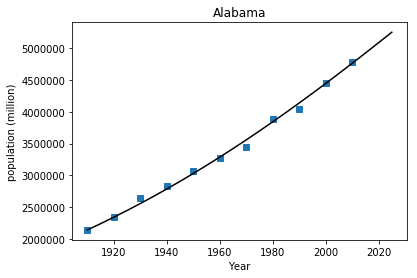

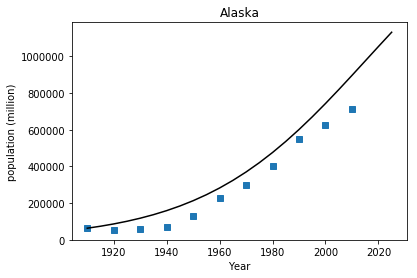

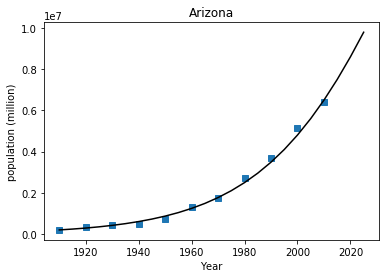

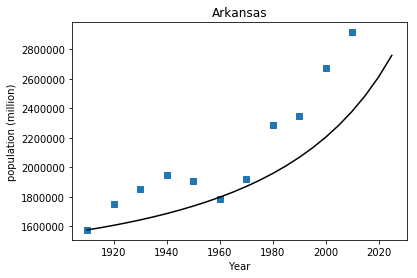

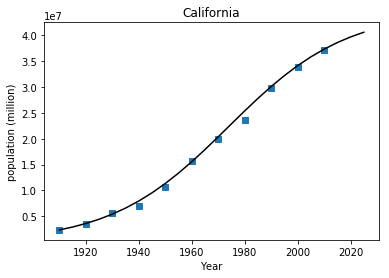

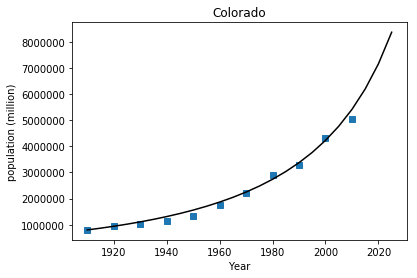

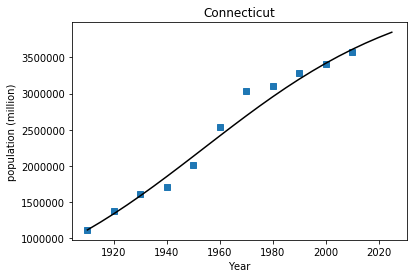

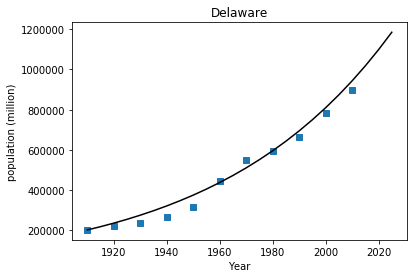

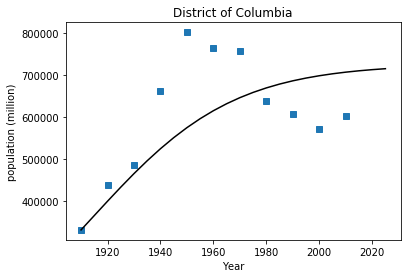

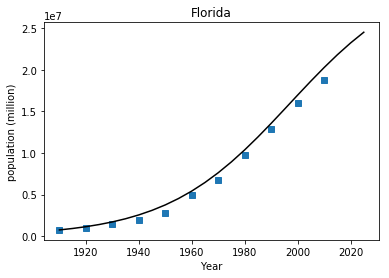

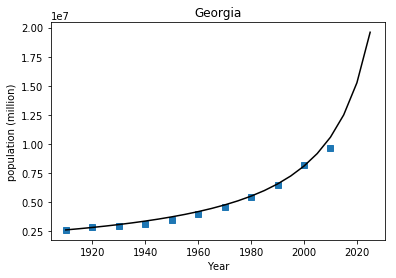

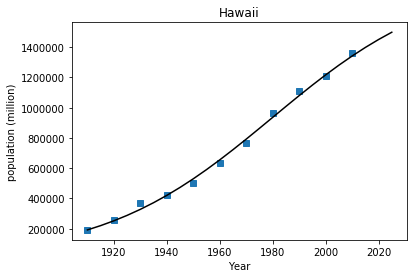

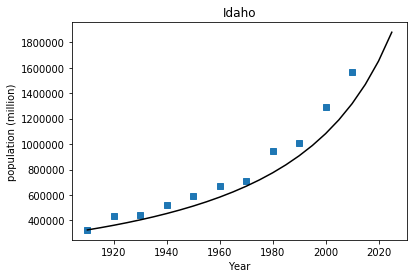

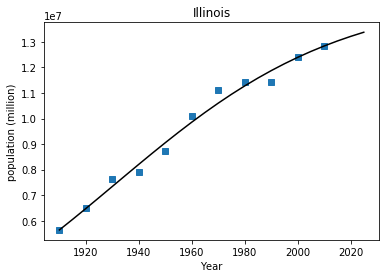

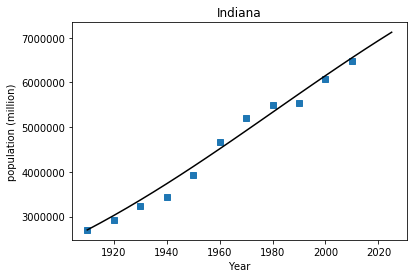

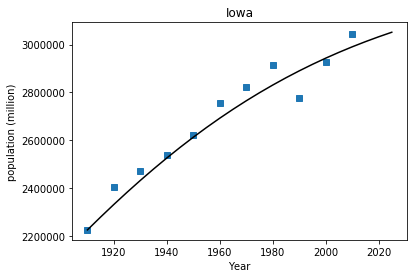

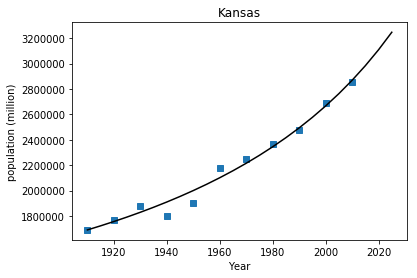

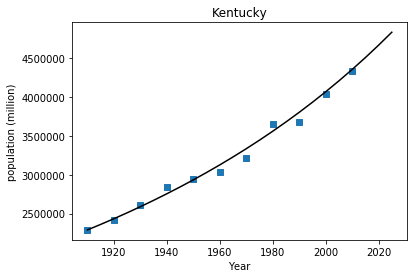

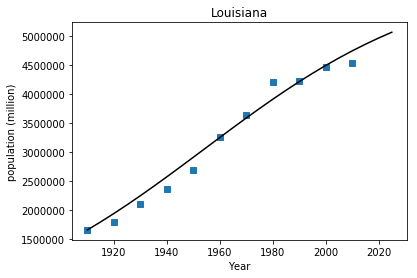

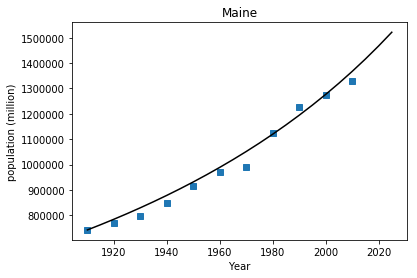

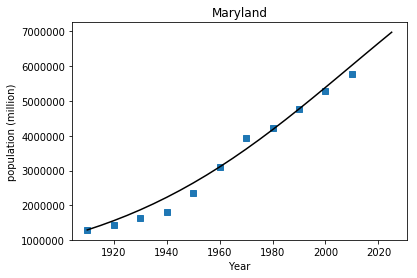

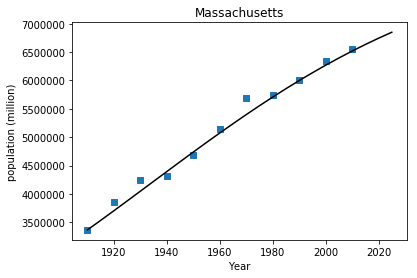

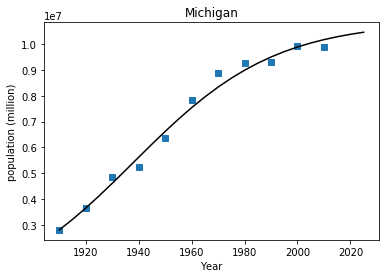

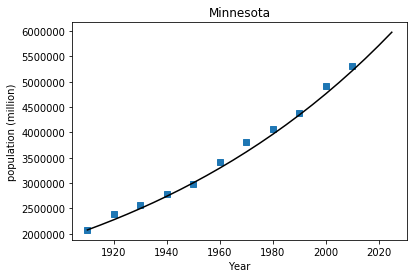

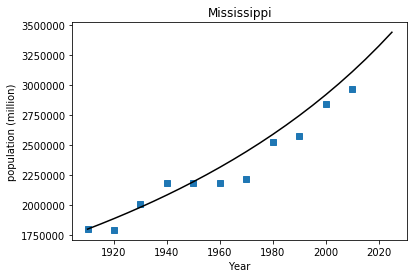

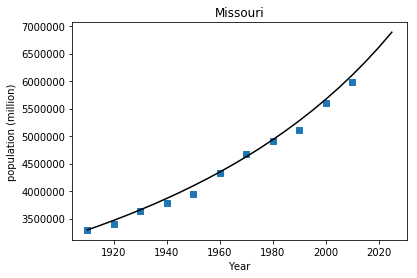

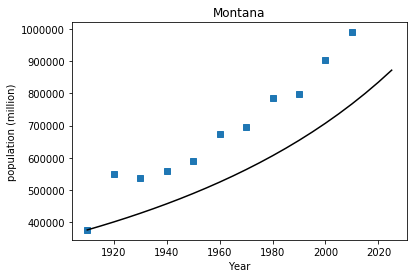

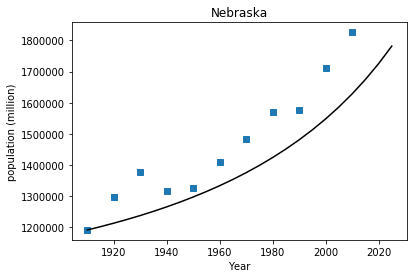

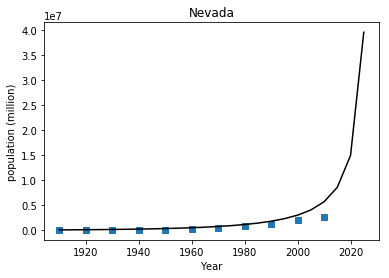

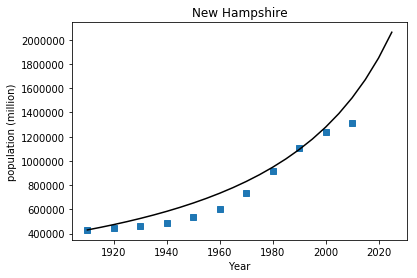

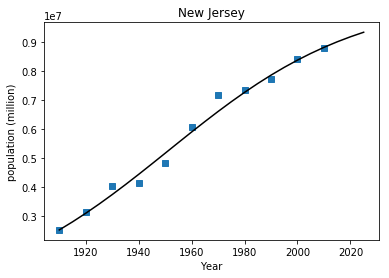

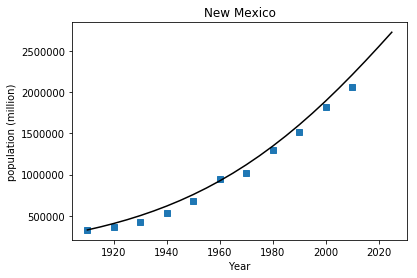

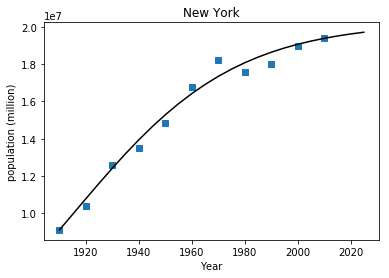

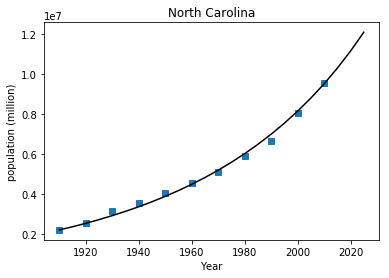

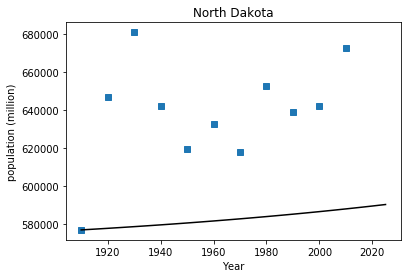

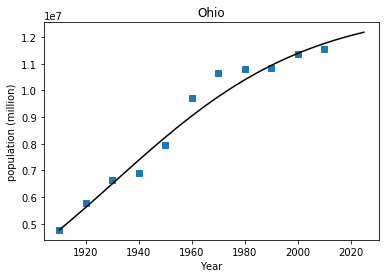

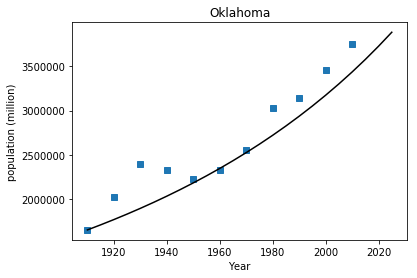

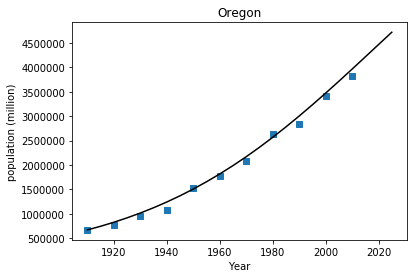

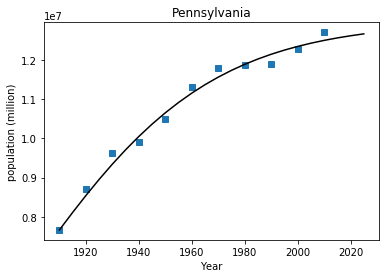

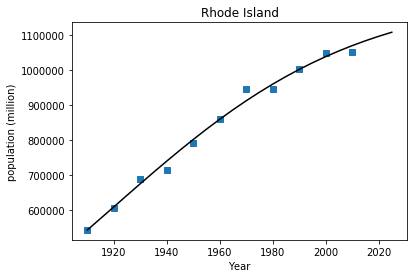

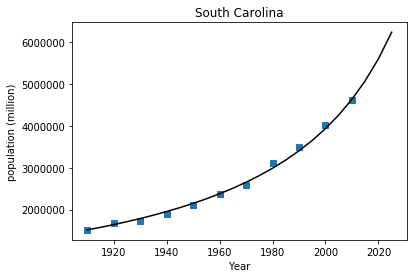

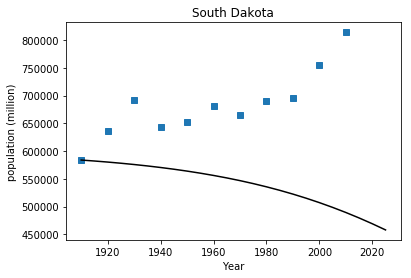

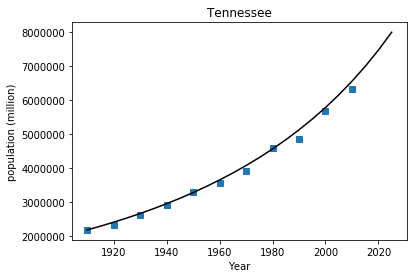

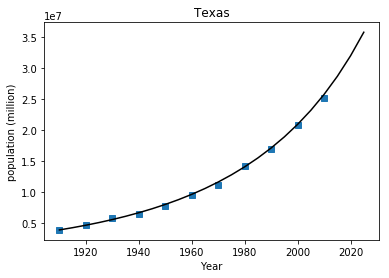

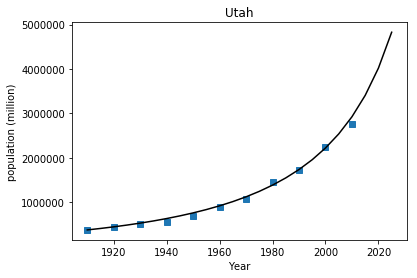

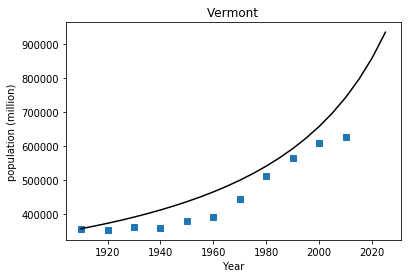

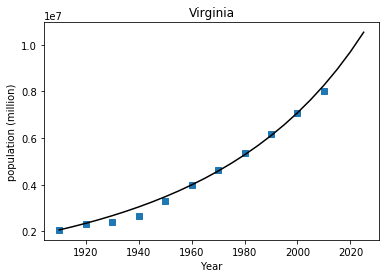

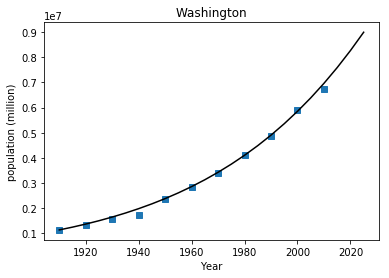

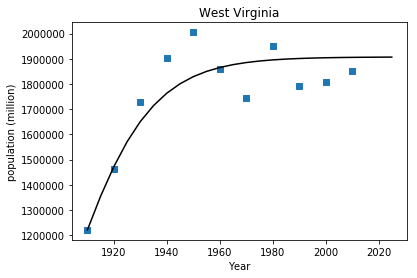

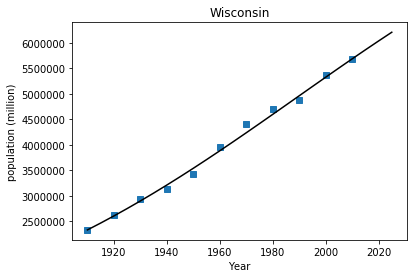

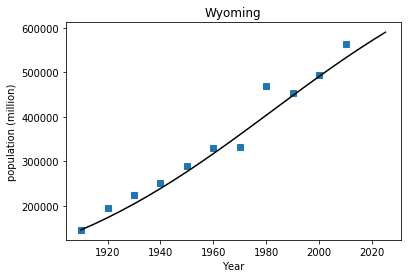

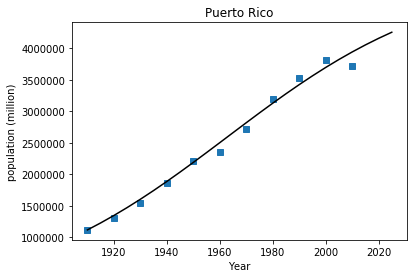

In [60]:
params = np.zeros(shape=(53,2))
for (idx, state) in enumerate(M):
    
    dN = (state[2:]-state[:-2])/(times[2:]-times[:-2])
    P = dN / state[1:-1]
    
    X = np.asarray([np.ones(9), state[1:-1]]).transpose()
    Y = np.asarray(P)
    alpha = np.linalg.lstsq(X,Y)[0]
    gamma = alpha[0]
    K = (-gamma) / alpha[1]

    params[idx][0] = gamma
    params[idx][1] = K
    
    # compute the model estimate for the population development
    t_estimate = np.arange(1910, 2030, 5)
    N0=state[0]
    t_model=t_estimate-1910
    N=K*(N0/K)*np.exp(gamma*t_model)/(1+(N0/
    K)*(np.exp(gamma*t_model)-1))
    plt.figure()
    plt.plot(times, state, 's')
    plt.plot(t_estimate, N, 'k')
    plt.title(states[idx])
    plt.xlabel('Year')
    plt.ylabel('population (million)')
plt.show()

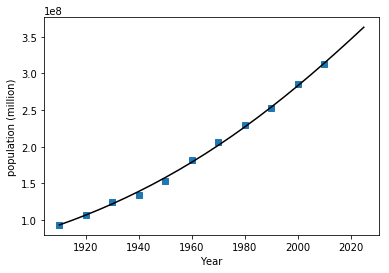

In [61]:
dN = (country_total[2:]-country_total[:-2])/(times[2:]-times[:-2])
P = dN / country_total[1:-1]
X = np.asarray([np.ones(9), country_total[1:-1]]).transpose()
Y = np.asarray(P)
alpha = np.linalg.lstsq(X,Y)[0]
gamma = alpha[0]
K = (-gamma) / alpha[1]

params[52][0] = gamma
params[52][1] = K
    
# compute the model estimate for the population development
t_estimate = np.arange(1910, 2030, 5)
N0=country_total[0]
t_model=t_estimate-1910
N=K*(N0/K)*np.exp(gamma*t_model)/(1+(N0/
K)*(np.exp(gamma*t_model)-1))
plt.figure()
plt.plot(times, country_total, 's')
plt.plot(t_estimate, N, 'k')
plt.xlabel('Year')
plt.ylabel('population (million)')
plt.show()

In [62]:
# Note that rows 0-51 correspond to the states and row 52 corresponds to the country as a whole
print(params)

[[  1.09603290e-02   1.24127657e+07]
 [  3.20832264e-02   1.96321061e+06]
 [  3.68616113e-02   3.11093151e+07]
 [ -1.10275903e-02   1.34793874e+06]
 [  4.50521212e-02   4.46596383e+07]
 [  1.42039959e-02  -6.44644609e+06]
 [  2.51704038e-02   4.49105554e+06]
 [  1.55405823e-02   5.11901229e+07]
 [  3.77443658e-02   7.26418178e+05]
 [  4.27496942e-02   3.19908722e+07]
 [ -7.79884494e-05   2.68356689e+04]
 [  3.10114594e-02   1.86850544e+06]
 [  7.03784706e-03  -6.64585712e+05]
 [  2.33947337e-02   1.48649940e+07]
 [  1.53908371e-02   1.07275954e+07]
 [  1.48938689e-02   3.32340968e+06]
 [ -1.92038938e-03   5.75342656e+05]
 [  5.20151379e-03  -1.34705154e+07]
 [  2.23440438e-02   6.11120001e+06]
 [  3.66533733e-03  -1.51839804e+06]
 [  2.11730441e-02   1.20471931e+07]
 [  1.65763421e-02   8.36126182e+06]
 [  3.74418435e-02   1.08613254e+07]
 [  9.37394267e-03   1.95424542e+08]
 [  2.28052149e-03  -1.67988034e+06]
 [  2.07205069e-03  -2.25308439e+06]
 [  4.40967881e-03  -8.75644280e+05]
 

# Analysis
As seen in both the graphs and the parameters above, the accuracy of our models varies widely from state to state. While the models for many states and for the U.S. as a whole seem relatively accurate, many are completely unrealistic, with values of $\gamma$ or $K$ being negative values. This is likely due to the fact that a number of states do not follow a strict logistic growth model. Several states experience stagnating or negative growth at numerous points throughout the past 100 years. Since the linear growth model does not account for these anomalies, 